In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
import gdown

In [ ]:
!gdown 1UylKm8Kz7RMq7Em40VAYeWW_9gXlhPUd

Downloading...
From: https://drive.google.com/uc?id=1UylKm8Kz7RMq7Em40VAYeWW_9gXlhPUd
To: /content/porter.csv
100% 23.8M/23.8M [00:00<00:00, 130MB/s] 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [ ]:
data = pd.read_csv('porter.csv')
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [ ]:
data.shape

(197428, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [ ]:
data.isna().sum(axis=0)

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [ ]:
data = data[~data['actual_delivery_time'].isna()]
# drop the rows where delivery time is not available.

## Let's create the target column

In [ ]:
data['created_at'] = pd.to_datetime(data['created_at'])
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'])

In [ ]:
data['time'] = round((data['actual_delivery_time'] - data['created_at']).dt.total_seconds()/60,2)

In [ ]:
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.98
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.07
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.68
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.25
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.83


## Imputing Null values

In [ ]:
data.isna().sum()

market_id                     987
created_at                      0
actual_delivery_time            0
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
time                            0
dtype: int64

In [ ]:
# distribution of market_id

data['market_id'].value_counts()

2.0    55055
4.0    47597
1.0    38037
3.0    23296
5.0    17999
6.0    14450
Name: market_id, dtype: int64

In [ ]:
data['market_id'].fillna(2.0, inplace = True)

In [ ]:
data['store_primary_category'].value_counts()

american             19399
pizza                17320
mexican              17098
burger               10958
sandwich             10059
                     ...  
lebanese                 9
belgian                  2
indonesian               2
chocolate                1
alcohol-plus-food        1
Name: store_primary_category, Length: 74, dtype: int64

In [ ]:
data['store_primary_category'] = data['store_primary_category'].fillna('american')

In [ ]:
data['order_protocol'].fillna(1.0, inplace = True)

In [ ]:
data.isna().sum()

market_id                       0
created_at                      0
actual_delivery_time            0
store_id                        0
store_primary_category          0
order_protocol                  0
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
time                            0
dtype: int64

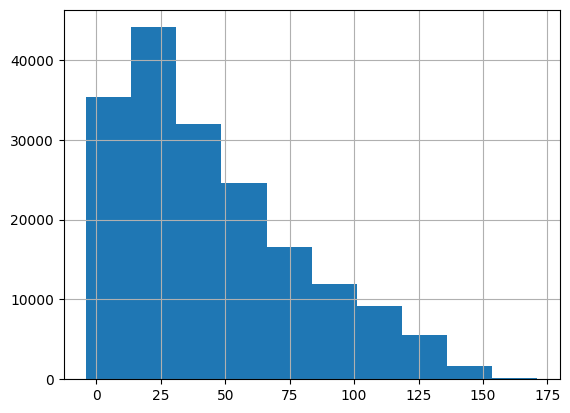

In [ ]:
data['total_onshift_partners'].hist()
plt.show()

In [ ]:
#median of total_onshift_partners

data['total_onshift_partners'].median()

37.0

In [ ]:
data['total_onshift_partners'].fillna(37.0,inplace = True)

In [ ]:
data['total_busy_partners'].fillna(data['total_busy_partners'].median(),inplace = True)

In [ ]:
data['total_outstanding_orders'].fillna(data['total_outstanding_orders'].median(),inplace = True)

In [ ]:
data.isna().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
time                        0
dtype: int64

## Feature Engineering


In [ ]:
data['hour'] = data['created_at'].dt.hour

In [ ]:
data['day'] = data['created_at'].dt.day_of_week

In [ ]:
data = data.drop(columns = ['created_at','actual_delivery_time','store_id'])

In [ ]:
data.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time,hour,day
0,1.0,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.98,22,4
1,2.0,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.07,21,1
2,3.0,american,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.68,20,3
3,3.0,american,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.25,21,1
4,3.0,american,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.83,2,6


<Axes: >

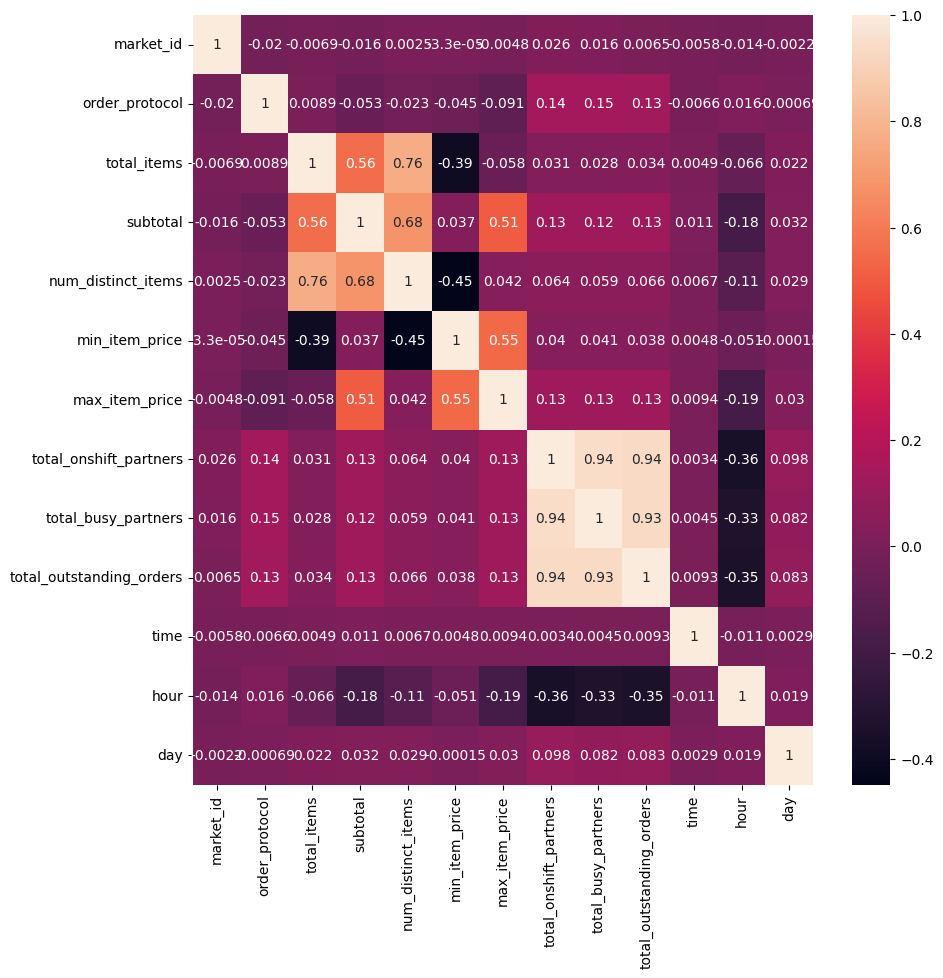

In [ ]:
plt.figure(figsize = (10,10))
sbn.heatmap(data.corr(), annot = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data['store_primary_category'] = LabelEncoder().fit_transform(data['store_primary_category'])

In [ ]:
data.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time,hour,day
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.98,22,4
1,2.0,47,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.07,21,1
2,3.0,4,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.68,20,3
3,3.0,4,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.25,21,1
4,3.0,4,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.83,2,6


In [ ]:
data.nunique(axis = 0)

market_id                      6
store_primary_category        74
order_protocol                 7
total_items                   57
subtotal                    8368
num_distinct_items            20
min_item_price              2312
max_item_price              2652
total_onshift_partners       172
total_busy_partners          159
total_outstanding_orders     281
time                        7134
hour                          19
day                            7
dtype: int64

In [ ]:
data.shape

(197421, 14)

## Data visualization and cleaning

<Axes: xlabel='time', ylabel='subtotal'>

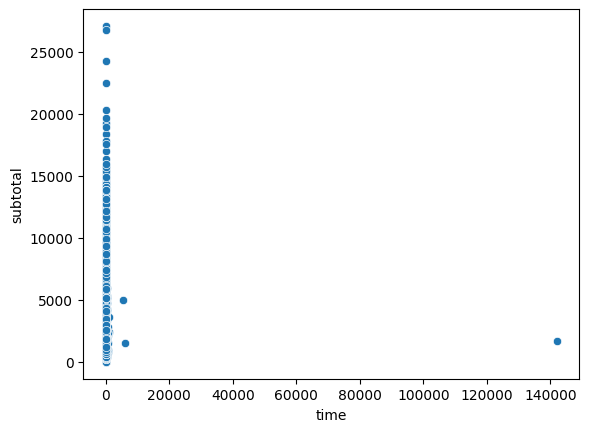

In [ ]:
sbn.scatterplot(x = 'time', y = 'subtotal', data = data)

In [ ]:
data.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time,hour,day
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.98,22,4
1,2.0,47,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.07,21,1
2,3.0,4,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.68,20,3
3,3.0,4,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.25,21,1
4,3.0,4,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.83,2,6


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
model1 = LocalOutlierFactor()
data['lof_score'] = model1.fit_predict(data)

In [ ]:
data.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time,hour,day,lof_score
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.98,22,4,1
1,2.0,47,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.07,21,1,1
2,3.0,4,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.68,20,3,1
3,3.0,4,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.25,21,1,1
4,3.0,4,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.83,2,6,1


In [ ]:
data = data[data['lof_score'] == 1]

<Axes: xlabel='day', ylabel='count'>

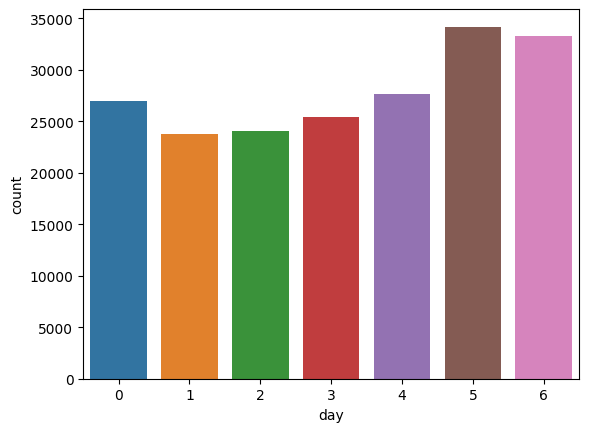

In [ ]:
sbn.countplot(x= 'day', data = data)

<Axes: xlabel='hour', ylabel='count'>

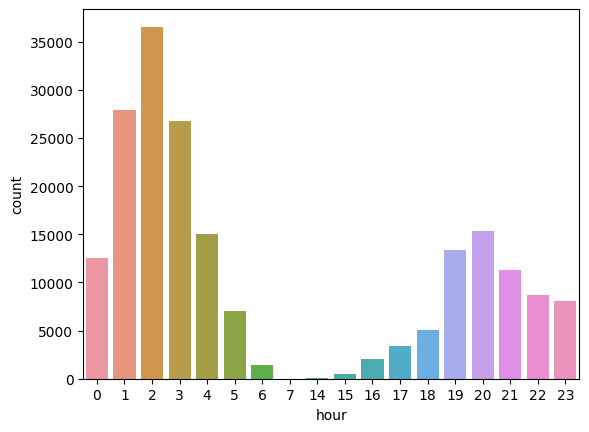

In [ ]:
sbn.countplot(x= 'hour', data = data)

<Axes: xlabel='hour', ylabel='time'>

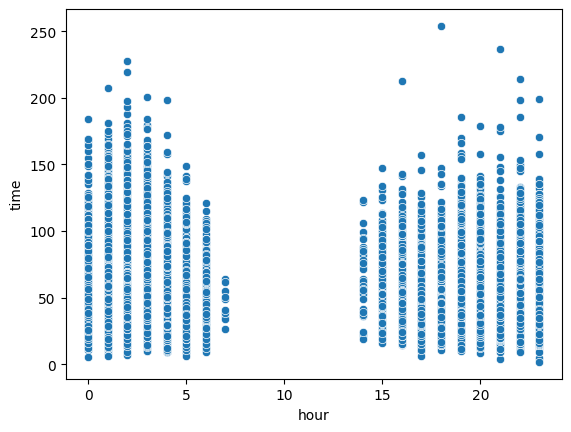

In [ ]:
sbn.scatterplot(x = 'hour', y = 'time', data=data)

<Axes: xlabel='hour', ylabel='total_onshift_partners'>

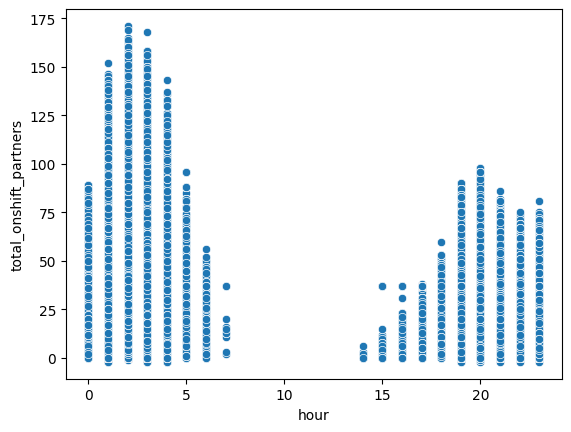

In [ ]:
sbn.scatterplot(x = 'hour', y = 'total_onshift_partners', data=data)

In [ ]:
# all the business is happening at night :)

## Data Modelling and split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(columns = ['time'])
y = data['time']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
prediction = regressor.predict(X_test)
mean_absolute_percentage_error(y_test,prediction)

0.26400264735534956

Text(0.5, 0, 'Random forest feature importance')

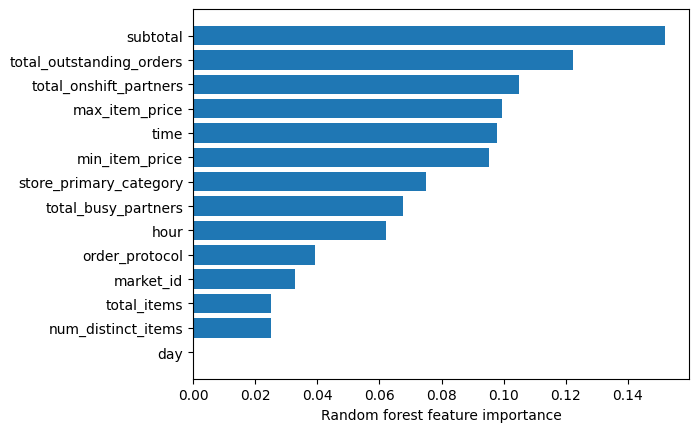

In [ ]:
indx = regressor.feature_importances_.argsort()
plt.barh(data.columns[indx], regressor.feature_importances_[indx])
plt.xlabel('Random forest feature importance')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense

In [ ]:
X_train.shape

(156131, 14)

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape = (14,), activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [ ]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.01), loss = 'mse', metrics = ['mse','mae'])
history = model.fit(X_train, y_train,epochs = 30, batch_size = 512, verbose= 1, validation_split = 0.2)

Epoch 1/30
244/244 [==============================] - 4s 5ms/step - loss: 298.5666 - mse: 298.5666 - mae: 12.7817 - val_loss: 251.8122 - val_mse: 251.8122 - val_mae: 12.1713
Epoch 2/30
244/244 [==============================] - 1s 4ms/step - loss: 254.4468 - mse: 254.4468 - mae: 11.9216 - val_loss: 257.7266 - val_mse: 257.7266 - val_mae: 12.5588
Epoch 3/30
244/244 [==============================] - 1s 4ms/step - loss: 249.4440 - mse: 249.4440 - mae: 11.7998 - val_loss: 245.1942 - val_mse: 245.1942 - val_mae: 11.6044
Epoch 4/30
244/244 [==============================] - 1s 4ms/step - loss: 246.8404 - mse: 246.8404 - mae: 11.7340 - val_loss: 243.3848 - val_mse: 243.3848 - val_mae: 11.7190
Epoch 5/30
244/244 [==============================] - 1s 4ms/step - loss: 247.9553 - mse: 247.9553 - mae: 11.7592 - val_loss: 243.3102 - val_mse: 243.3102 - val_mae: 11.8494
Epoch 6/30
244/244 [==============================] - 1s 4ms/step - loss: 244.2470 - mse: 244.2470 - mae: 11.6587 - val_loss: 241.

In [ ]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

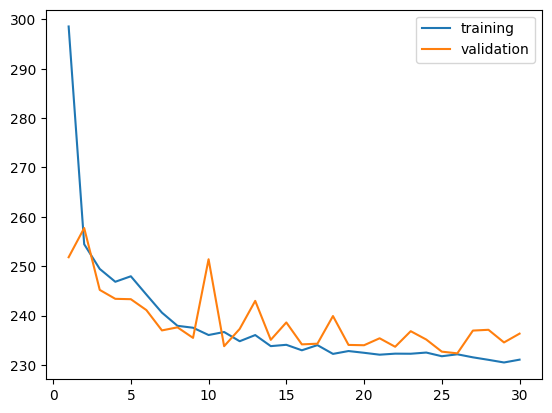

In [ ]:
sbn.lineplot(x = np.arange(1,len(history.history['loss'])+1), y = history.history['loss'], label = 'training')
sbn.lineplot(x = np.arange(1,len(history.history['loss'])+1), y = history.history['val_loss'], label = 'validation')
plt.legend()
plt.show()

In [ ]:
model2 = Sequential()
model2.add(Dense(14, input_shape = (14,), activation = 'relu'))
model2.add(Dense(1, activation = 'linear'))

In [ ]:
model2.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.01), loss = 'mse', metrics = ['mse','mae'])
history = model.fit(X_train, y_train,epochs = 30, batch_size = 1024, verbose= 1, validation_split = 0.2)

Epoch 1/30
122/122 [==============================] - 1s 6ms/step - loss: 228.6549 - mse: 228.6549 - mae: 11.2607 - val_loss: 230.9240 - val_mse: 230.9240 - val_mae: 11.2607
Epoch 2/30
122/122 [==============================] - 1s 5ms/step - loss: 227.7273 - mse: 227.7273 - mae: 11.2298 - val_loss: 231.0741 - val_mse: 231.0741 - val_mae: 11.4251
Epoch 3/30
122/122 [==============================] - 1s 6ms/step - loss: 227.6734 - mse: 227.6734 - mae: 11.2391 - val_loss: 237.9299 - val_mse: 237.9299 - val_mae: 11.2089
Epoch 4/30
122/122 [==============================] - 1s 8ms/step - loss: 227.3713 - mse: 227.3713 - mae: 11.2297 - val_loss: 231.4290 - val_mse: 231.4290 - val_mae: 11.3138
Epoch 5/30
122/122 [==============================] - 1s 8ms/step - loss: 227.5502 - mse: 227.5502 - mae: 11.2298 - val_loss: 230.4984 - val_mse: 230.4984 - val_mae: 11.3550
Epoch 6/30
122/122 [==============================] - 1s 9ms/step - loss: 227.1531 - mse: 227.1531 - mae: 11.2220 - val_loss: 233.

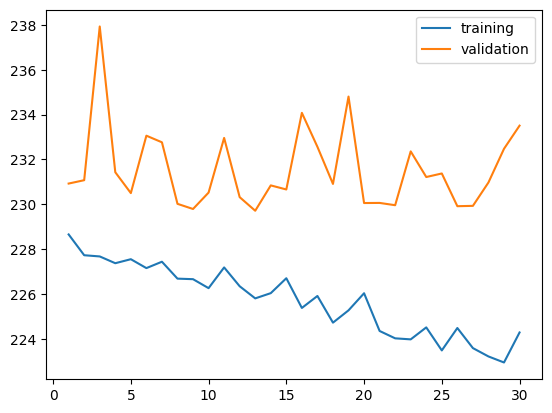

In [ ]:
sbn.lineplot(x = np.arange(1,len(history.history['loss'])+1), y = history.history['loss'], label = 'training')
sbn.lineplot(x = np.arange(1,len(history.history['loss'])+1), y = history.history['val_loss'], label = 'validation')
plt.legend()
plt.show()

In [67]:
from sklearn.metrics import mean_absolute_percentage_error

Epoch 1/40
244/244 [==============================] - 4s 7ms/step - loss: 477.7107 - mse: 477.7107 - mae: 15.7760 - val_loss: 263.8560 - val_mse: 263.8560 - val_mae: 12.0309
Epoch 2/40
244/244 [==============================] - 1s 4ms/step - loss: 256.0599 - mse: 256.0599 - mae: 11.9672 - val_loss: 254.9502 - val_mse: 254.9502 - val_mae: 12.1904
Epoch 3/40
244/244 [==============================] - 1s 4ms/step - loss: 251.3776 - mse: 251.3776 - mae: 11.8481 - val_loss: 251.1788 - val_mse: 251.1788 - val_mae: 11.9102
Epoch 4/40
244/244 [==============================] - 1s 4ms/step - loss: 250.4498 - mse: 250.4498 - mae: 11.8304 - val_loss: 250.1747 - val_mse: 250.1747 - val_mae: 11.8493
Epoch 5/40
244/244 [==============================] - 1s 4ms/step - loss: 248.6997 - mse: 248.6997 - mae: 11.7820 - val_loss: 249.5806 - val_mse: 249.5806 - val_mae: 11.8253
Epoch 6/40
244/244 [==============================] - 1s 4ms/step - loss: 249.0967 - mse: 249.0967 - mae: 11.7910 - val_loss: 250.

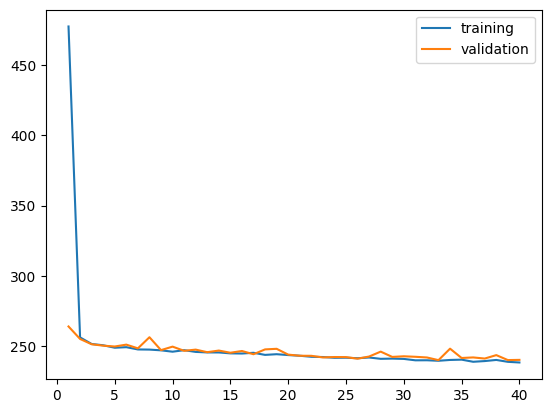

In [68]:
model3 = Sequential()
model3.add(Dense(14, input_shape = (14,), activation = 'relu'))
model3.add(Dense(64,activation = 'relu'))
model3.add(Dense(16, activation = 'relu'))
model3.add(Dense(1, activation = 'linear'))

model3.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.01), loss = 'mse', metrics = ['mse','mae'])
history3 = model3.fit(X_train, y_train,epochs = 40, batch_size = 512, verbose= 1, validation_split = 0.2)

sbn.lineplot(x = np.arange(1,len(history3.history['loss'])+1), y = history3.history['loss'], label = 'training')
sbn.lineplot(x = np.arange(1,len(history3.history['loss'])+1), y = history3.history['val_loss'], label = 'validation')
plt.legend()
plt.show()

In [72]:
from keras.initializers import he_normal

Epoch 1/40
244/244 [==============================] - 3s 6ms/step - loss: 311.7282 - mse: 311.7282 - mae: 13.0146 - val_loss: 256.2583 - val_mse: 256.2583 - val_mae: 12.0090
Epoch 2/40
244/244 [==============================] - 1s 4ms/step - loss: 250.2934 - mse: 250.2934 - mae: 11.8210 - val_loss: 247.4939 - val_mse: 247.4939 - val_mae: 11.8073
Epoch 3/40
244/244 [==============================] - 1s 4ms/step - loss: 249.6059 - mse: 249.6059 - mae: 11.7982 - val_loss: 254.3787 - val_mse: 254.3787 - val_mae: 12.3762
Epoch 4/40
244/244 [==============================] - 1s 4ms/step - loss: 248.9772 - mse: 248.9772 - mae: 11.7879 - val_loss: 253.4305 - val_mse: 253.4305 - val_mae: 11.6220
Epoch 5/40
244/244 [==============================] - 1s 4ms/step - loss: 249.3916 - mse: 249.3916 - mae: 11.7981 - val_loss: 246.4065 - val_mse: 246.4065 - val_mae: 11.7953
Epoch 6/40
244/244 [==============================] - 1s 4ms/step - loss: 248.1776 - mse: 248.1776 - mae: 11.7664 - val_loss: 247.

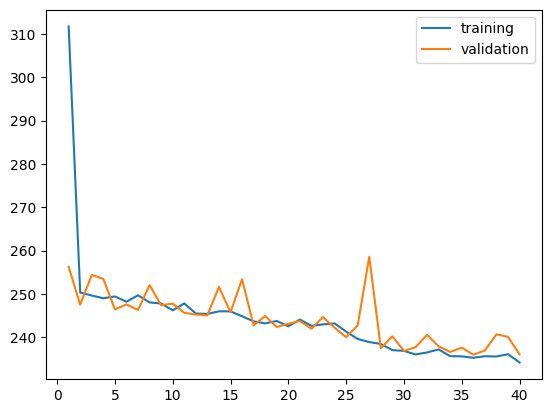

In [73]:
model4 = Sequential()
model4.add(Dense(14, input_shape = (14,), activation = 'relu',kernel_initializer = he_normal()))
model4.add(Dense(64,activation = 'relu',kernel_initializer = he_normal()))
model4.add(Dense(16, activation = 'relu',kernel_initializer = he_normal()))
model4.add(Dense(1, activation = 'linear'))

model4.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.05), loss = 'mse', metrics = ['mse','mae'])
history4 = model4.fit(X_train, y_train,epochs = 40, batch_size = 512, verbose= 1, validation_split = 0.2)

sbn.lineplot(x = np.arange(1,len(history4.history['loss'])+1), y = history4.history['loss'], label = 'training')
sbn.lineplot(x = np.arange(1,len(history4.history['loss'])+1), y = history4.history['val_loss'], label = 'validation')
plt.legend()
plt.show()

Epoch 1/40
244/244 [==============================] - 3s 7ms/step - loss: 425.9659 - mse: 425.9659 - mae: 14.9790 - val_loss: 260.8950 - val_mse: 260.8950 - val_mae: 12.3631
Epoch 2/40
244/244 [==============================] - 1s 6ms/step - loss: 251.7012 - mse: 251.7012 - mae: 11.8706 - val_loss: 249.4077 - val_mse: 249.4077 - val_mae: 11.7421
Epoch 3/40
244/244 [==============================] - 1s 5ms/step - loss: 248.1485 - mse: 248.1485 - mae: 11.7722 - val_loss: 249.1530 - val_mse: 249.1530 - val_mae: 11.8599
Epoch 4/40
244/244 [==============================] - 1s 4ms/step - loss: 247.1474 - mse: 247.1474 - mae: 11.7502 - val_loss: 250.3725 - val_mse: 250.3725 - val_mae: 12.1236
Epoch 5/40
244/244 [==============================] - 1s 4ms/step - loss: 246.5263 - mse: 246.5263 - mae: 11.7290 - val_loss: 246.6730 - val_mse: 246.6730 - val_mae: 11.7804
Epoch 6/40
244/244 [==============================] - 1s 4ms/step - loss: 247.0728 - mse: 247.0728 - mae: 11.7437 - val_loss: 247.

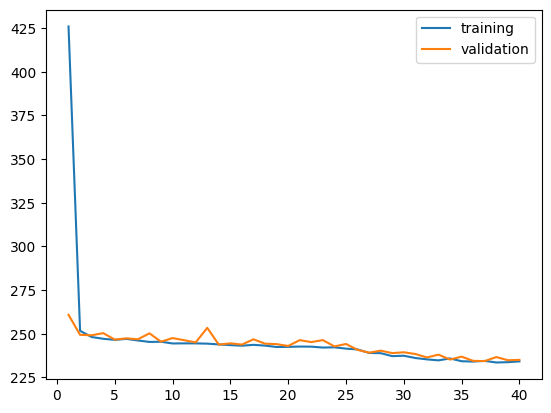

In [74]:
model5 = Sequential()
model5.add(Dense(14, input_shape = (14,), activation = 'relu',kernel_initializer = he_normal()))
model5.add(Dense(64,activation = 'relu',kernel_initializer = he_normal()))
model5.add(Dense(16, activation = 'relu',kernel_initializer = he_normal()))
model5.add(Dense(1, activation = 'linear'))

model5.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.01), loss = 'mse', metrics = ['mse','mae'])
history5 = model5.fit(X_train, y_train,epochs = 40, batch_size = 512, verbose= 1, validation_split = 0.2)

sbn.lineplot(x = np.arange(1,len(history5.history['loss'])+1), y = history5.history['loss'], label = 'training')
sbn.lineplot(x = np.arange(1,len(history5.history['loss'])+1), y = history5.history['val_loss'], label = 'validation')
plt.legend()
plt.show()

In [76]:
prediction = model5.predict(X_test)

1220/1220 [==============================] - 3s 3ms/step


In [77]:
mean_absolute_percentage_error(prediction, y_test)

0.24510890902444843

In [81]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.7 MB/s eta 0:00:00


In [82]:
import optuna
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def objective(trial):
  model = Sequential()
  model.add(Dense(trial.suggest_int('first_layer', 10,50), input_shape = (X_train.shape[1],), kernel_initializer= 'he_normal'))
  for i in range(trial.suggest_int('num_layer', 1,3)):
    model.add(Dense(trial.suggest_int(f'h{i}_layer', 10,50), activation = 'relu', kernel_initializer = 'he_normal'))
  model.add(Dense(1, activation='linear'))
  optimizer = Adam(learning_rate=trial.suggest_loguniform('learning_rate', 1e-5, 1e-2))
  model.compile(optimizer=optimizer, loss='mean_squared_error')

  # Train the model
  model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

  # Evaluate on the validation set
  y_pred = model.predict(X_val)
  mse = mean_squared_error(y_val, y_pred.flatten())

  return mse



In [ ]:

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

print('Best trial:')
print(study.best_trial.params)